# Exercises

In [5]:
%pip install pandas statsmodels seaborn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
from matplotlib.pyplot import legend, colormaps

# Exercise 3.1

In [7]:
catheter_df = pd.read_csv('../data/catheter.csv')
catheter_df.head()

,height,weight,catlength
0,107.4,18.0,37.0
1,159.4,42.1,49.5
2,94.1,16.0,34.5
3,99.1,13.5,36.0
4,114.2,23.4,43.0


a)

In [8]:
x_height = sm.add_constant(catheter_df.height)
y = catheter_df.catlength

modelled_by_height = sm.OLS(y, x_height).fit()

modelled_by_height.summary()

/Users/marbetschar/Development/marbetschar/notes/.venv/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  k, _ = kurtosistest(a, axis)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              catlength   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     34.73
Date:                Sun, 26 Oct 2025   Prob (F-statistic):           0.000152
Time:                        13:45:10   Log-Likelihood:                -32.594
No. Observations:                  12   AIC:                             69.19
Df Residuals:                      10   BIC:                             70.16
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.1271      4.247      2.855      0.017       2.664      21.590
height         0.2377      0.040      5.893      0.000       0.148       0.328
==============================================================================
Omnibus:                        0.408   Durbin-Watson:                   1.790
Prob(Omnibus):                  0.815   Jarque-Bera (JB):                0.073
Skew:                          -0.165   Prob(JB):                        0.964
Kurtosis:                       2.806   Cond. No.                         386.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
x_weight = sm.add_constant(catheter_df.weight)
y = catheter_df.catlength

modelled_by_weight = sm.OLS(y, x_weight).fit()

modelled_by_weight.summary()

/Users/marbetschar/Development/marbetschar/notes/.venv/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  k, _ = kurtosistest(a, axis)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              catlength   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     39.86
Date:                Sun, 26 Oct 2025   Prob (F-statistic):           8.75e-05
Time:                        13:45:10   Log-Likelihood:                -31.943
No. Observations:                  12   AIC:                             67.89
Df Residuals:                      10   BIC:                             68.86
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.6263      2.003     12.796      0.000      21.164      30.088
weight         0.6161      0.098      6.313      0.000       0.399       0.834
==============================================================================
Omnibus:                        2.618   Durbin-Watson:                   1.854
Prob(Omnibus):                  0.270   Jarque-Bera (JB):                0.500
Skew:                          -0.279   Prob(JB):                        0.779
Kurtosis:                       3.830   Cond. No.                         37.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Predictor Significance**

**For `modelled_by_height`:**
- **Height predictor**: p-value = 0.000 (< 0.05) → **Significant** ✓
- The height coefficient is 0.2377 with P>|t| = 0.000

**For `modelled_by_weight`:**
- **Weight predictor**: p-value = 0.000 (< 0.05) → **Significant** ✓
- The weight coefficient is 0.6161 with P>|t| = 0.000

Both predictors are highly significant in their respective models. Both p-values are well below the conventional significance level of 0.05, indicating strong evidence that both height and weight have a significant relationship with catheter length.

Additionally:
- The F-statistic for both models also shows very low p-values (0.000152 for height, 8.75e-05 for weight), confirming overall model significance
- Weight model has slightly higher R-squared (0.799 vs 0.776), suggesting it explains slightly more variance in catheter length than height alone

b)

In [10]:
x_height_and_weight = sm.add_constant(catheter_df[['height', 'weight']])
y = catheter_df.catlength

modelled_by_height_and_weight = sm.OLS(y, x_height_and_weight).fit()
modelled_by_height_and_weight.summary()

/Users/marbetschar/Development/marbetschar/notes/.venv/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  k, _ = kurtosistest(a, axis)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              catlength   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     18.65
Date:                Sun, 26 Oct 2025   Prob (F-statistic):           0.000630
Time:                        13:45:10   Log-Likelihood:                -31.757
No. Observations:                  12   AIC:                             69.51
Df Residuals:                       9   BIC:                             70.97
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.0853      8.770      2.404      0.040       1.245      40.925
height         0.0768      0.144      0.533      0.607      -0.249       0.403
weight         0.4275      0.368      1.161      0.275      -0.405       1.260
==============================================================================
Omnibus:                        1.049   Durbin-Watson:                   1.814
Prob(Omnibus):                  0.592   Jarque-Bera (JB):                0.029
Skew:                          -0.017   Prob(JB):                        0.986
Kurtosis:                       3.239   Cond. No.                         826.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Predictor Significance in Multiple Linear Regression**

**Individual Predictor Significance:**

**Height:**
- Coefficient: 0.0768
- p-value: 0.607 (> 0.05) → **NOT Significant** ✗
- 95% CI: [-0.249, 0.403] (includes zero)

**Weight:**
- Coefficient: 0.4275
- p-value: 0.275 (> 0.05) → **NOT Significant** ✗
- 95% CI: [-0.405, 1.260] (includes zero)

**Overall Model Significance:**

- **F-statistic**: 18.65 with p-value (= "Prob (F-statistic)") = 0.000630 (< 0.05) → **Model is Significant** ✓
- **R-squared**: 0.806 (80.6% of variance explained)
- **Adj. R-squared**: 0.762

**Key Interpretation:**

This is a classic case of **multicollinearity**!

**What's happening:**
1. **Overall model is significant** - height and weight together significantly predict catheter length
2. **Individual predictors are NOT significant** - neither appears significant when controlling for the other
3. **High condition number (826)** - indicates multicollinearity between height and weight

**Why this occurs:**

- Height and weight are highly correlated with each other
- When both are in the model, they "compete" to explain the same variance
- Each predictor's unique contribution (after accounting for the other) is not statistically significant
- Yet together, they explain substantial variance (R² = 0.806)

**Comparison Summary:**

| Model | Predictor(s) Significant? | R² |
| --- | --- | --- |
| Height only | ✓ Yes (p < 0.001) | 0.776 |
| Weight only | ✓ Yes (p < 0.001) | 0.799 |
| Height + Weight (MLR) | ✗ Neither (p > 0.05) | 0.806 |

**Conclusion:** The predictors are NOT individually significant in the multiple linear regression, likely due to multicollinearity between height and weight.


c) As seen in the summary output above, both predictors are insignificant:

- height: p-value = 0.697 which is not < 0.05
- weight: p-value = 0.275 which is not < 0.05

Is this a contradiction to the results obtained in the two simple linear regression models? The answer is no. In multiple linear regression, on the basis of the hypotheses tests we decide whether the predictor variable height is required when the value of the predictor weight is known. The answer is no and the same holds vice versa.

However, the gllobal F-test indicates that we need at least one of the two predictors:

- Prob (F-statistic) = 0.00063 which is < 0.05

**Conclusion:**

So we do not need to include both predictors simultaneously but
we need one of them. This situation occurs when the predictors are strongly
correlated. Due to the smaller p-value (= 0.275) we would prefer to include the predictor
weight in the regression model.

d)

In [11]:
height = 120
weight = 25

y_height_and_weight = modelled_by_height_and_weight.get_prediction([[1, height, weight]])
y_height = modelled_by_height.get_prediction([[1, height]])
y_weight = modelled_by_weight.get_prediction([[1, weight]])

summaries = []
for pred in [y_height_and_weight, y_height, y_weight]:
    summary = pred.summary_frame(alpha = 0.05).loc[0]
    summaries.append(summary)

pd.DataFrame(summaries, index = ['height_and_weight', 'height', 'weight'])

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
height_and_weight,40.990715,1.388277,37.850214,44.131217,31.539886,50.441545
height,40.656088,1.381543,37.577820,43.734357,31.208908,50.103269
weight,41.029545,1.335813,38.053167,44.005922,32.061623,49.997467


In practice, a prediction error of ± 2 cm would be acceptable. Do the data and
the models allow for a prediction of catlength that is sufficiently precise?

Neither one of the models fulfills this criteria because all of them have a observation confidence interval which is way bigger than 2cm (all of them are roughly [30, 50]).

# Exercise 3.2

In [12]:
savings_df = pd.read_csv('../Data/savings.csv')
savings_df

,Unnamed: 0,sr,pop15,pop75,dpi,ddpi
0,Australia,11.43,29.35,2.87,2329.68,2.87
1,Austria,12.07,23.32,4.41,1507.99,3.93
2,Belgium,13.17,23.80,4.43,2108.47,3.82
3,Bolivia,5.75,41.89,1.67,189.13,0.22
4,Brazil,12.88,42.19,0.83,728.47,4.56
5,Canada,8.79,31.72,2.85,2982.88,2.43
6,Chile,0.60,39.74,1.34,662.86,2.67
7,China,11.90,44.75,0.67,289.52,6.51
8,Colombia,4.98,46.64,1.06,276.65,3.08
9,Costa Rica,10.78,47.64,1.14,471.24,2.80


a)

In [13]:
x_sm = sm.add_constant(savings_df[['pop15', 'pop75', 'dpi', 'ddpi']])

model = sm.OLS(savings_df.sr, x_sm).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sr   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     5.756
Date:                Sun, 26 Oct 2025   Prob (F-statistic):           0.000790
Time:                        13:45:11   Log-Likelihood:                -135.10
No. Observations:                  50   AIC:                             280.2
Df Residuals:                      45   BIC:                             289.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.5661      7.355      3.884      0.000      13.753      43.379
pop15         -0.4612      0.145     -3.189      0.003      -0.753      -0.170
pop75         -1.6915      1.084     -1.561      0.126      -3.874       0.491
dpi           -0.0003      0.001     -0.362      0.719      -0.002       0.002
ddpi           0.4097      0.196      2.088      0.042       0.015       0.805
==============================================================================
Omnibus:                        0.866   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.649   Jarque-Bera (JB):                0.493
Skew:                           0.241   Prob(JB):                        0.782
Kurtosis:                       3.064   Cond. No.                     2.04e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
import sys

if ".." not in sys.path:
    sys.path.insert(0, "..")

In [22]:
from testing_model_assumptions import tma_plots

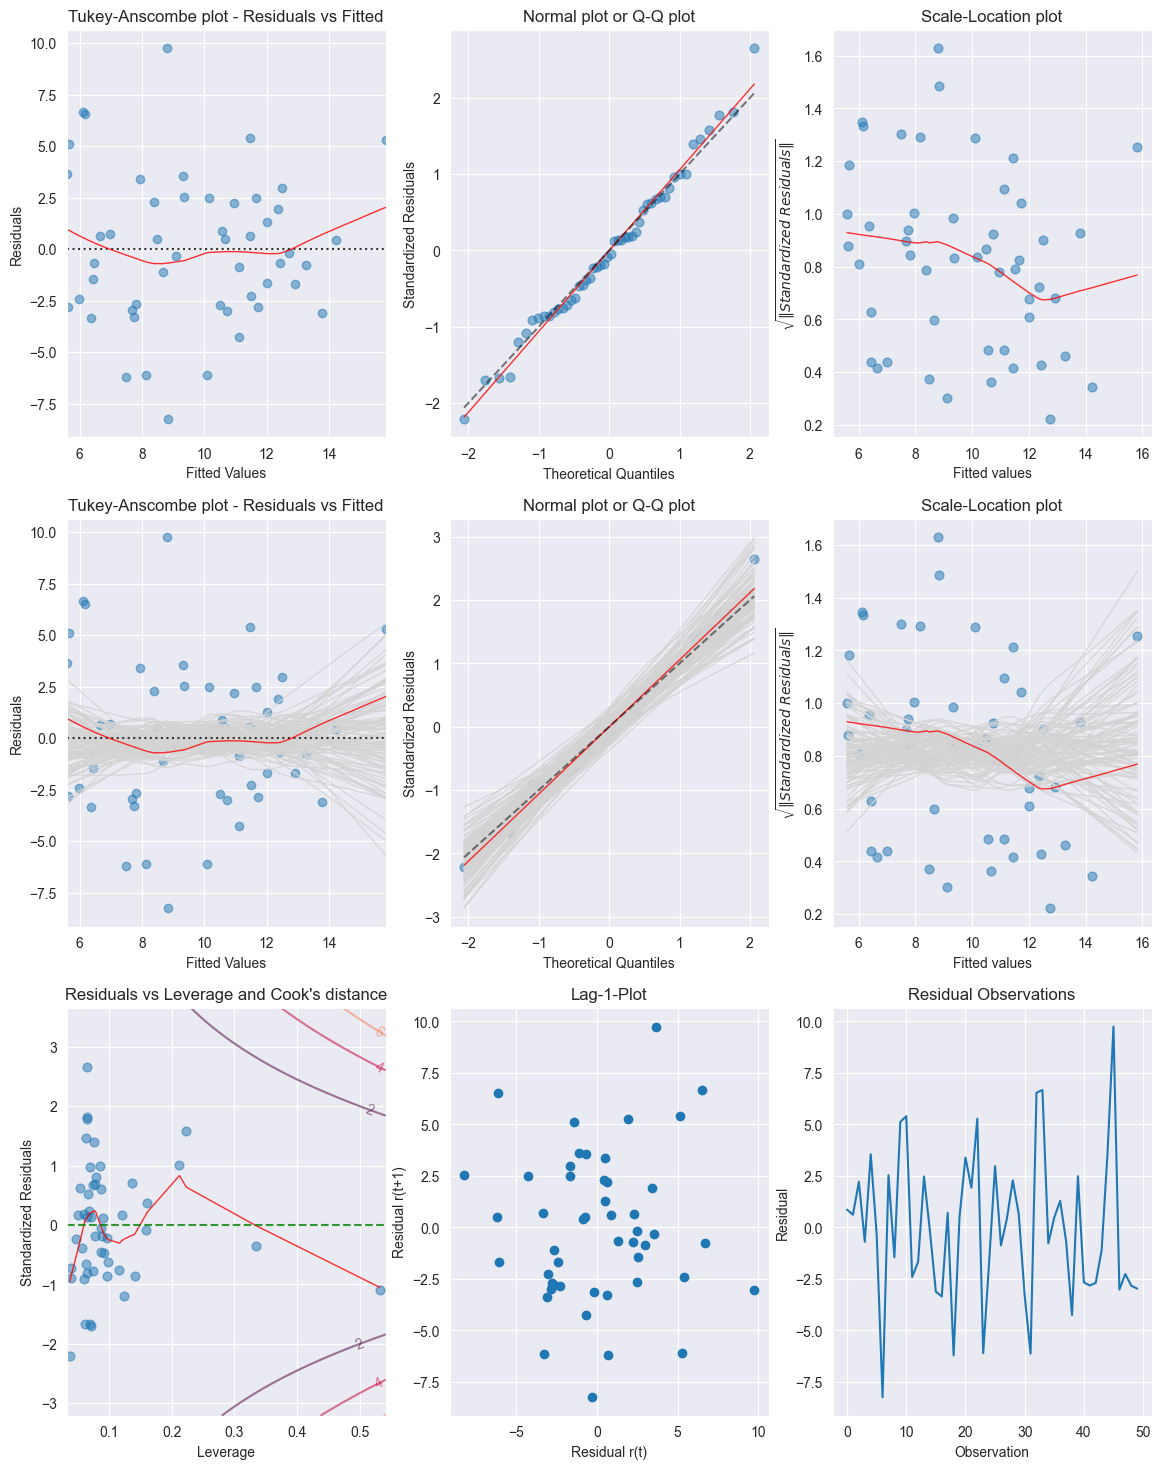

In [23]:
tma_plots(model, n_samp=100)

**Residual Analysis:**

1. For the expected value of all $\epsilon_i$ we have $E[\epsilon_i] = 0$:
    - ✅ The Tukey-Anscompe plot (upper-left) shows that the residuals are contained within the grey smoothing lines. We conclude that the expected value of all $\epsilon_i$ is zero.
2. The error terms $\epsilon_i$ all have the same constant variance $Var[\epsilon_i] = \sigma^2$
    - ✅ The Scale-Location Plot (upper-right) tends to decrease, but it is contained within the grey band of simulated smoothing curves. We conclude that the variances of the error terms $\epsilon_i$ are constant.
3. The error terms $\epsilon_i$ are normally distributed
    - ✅ The data points are contained in the grey band of the simulated curves in the Q-Q plot (upper-middle). We therefore interpret the error terms $\epsilon_i$ as normally distributed.
4. The error terms $\epsilon_i$ are independent
    - ✅ There is no specific notion of time in the data. Therefore we assume that the error terms $\epsilon_i$ are independent.

**Conclusion:** All assumptions of a linear regression are fulfilled.

b)

In [25]:
residual_influence = model.get_influence()
residual_influence_leverage = residual_influence.hat_matrix_diag

savings_df['leverage'] = residual_influence_leverage
savings_sorted_df = savings_df.sort_values('leverage', ascending=False)
savings_sorted_df.head()

,Unnamed: 0,sr,pop15,pop75,dpi,ddpi,leverage
48,Libya,8.89,43.69,2.07,123.58,16.71,0.531457
43,United States,7.56,29.81,3.43,4001.89,2.45,0.333688
22,Japan,21.10,27.01,1.91,1257.28,8.21,0.223310
20,Ireland,11.34,31.16,4.19,1139.95,2.99,0.212236
36,South Rhodesia,13.30,31.92,1.52,250.96,2.00,0.160809


In [26]:
savings_sorted_df['country'] = 'Other'
country_iloc = savings_sorted_df.columns.get_loc('country')

for i in range(3):
    savings_sorted_df.iloc[i, country_iloc] = savings_sorted_df.iloc[i, 0]

savings_sorted_df.head()

,Unnamed: 0,sr,pop15,pop75,dpi,ddpi,leverage,country
48,Libya,8.89,43.69,2.07,123.58,16.71,0.531457,Libya
43,United States,7.56,29.81,3.43,4001.89,2.45,0.333688,United States
22,Japan,21.10,27.01,1.91,1257.28,8.21,0.223310,Japan
20,Ireland,11.34,31.16,4.19,1139.95,2.99,0.212236,Other
36,South Rhodesia,13.30,31.92,1.52,250.96,2.00,0.160809,Other


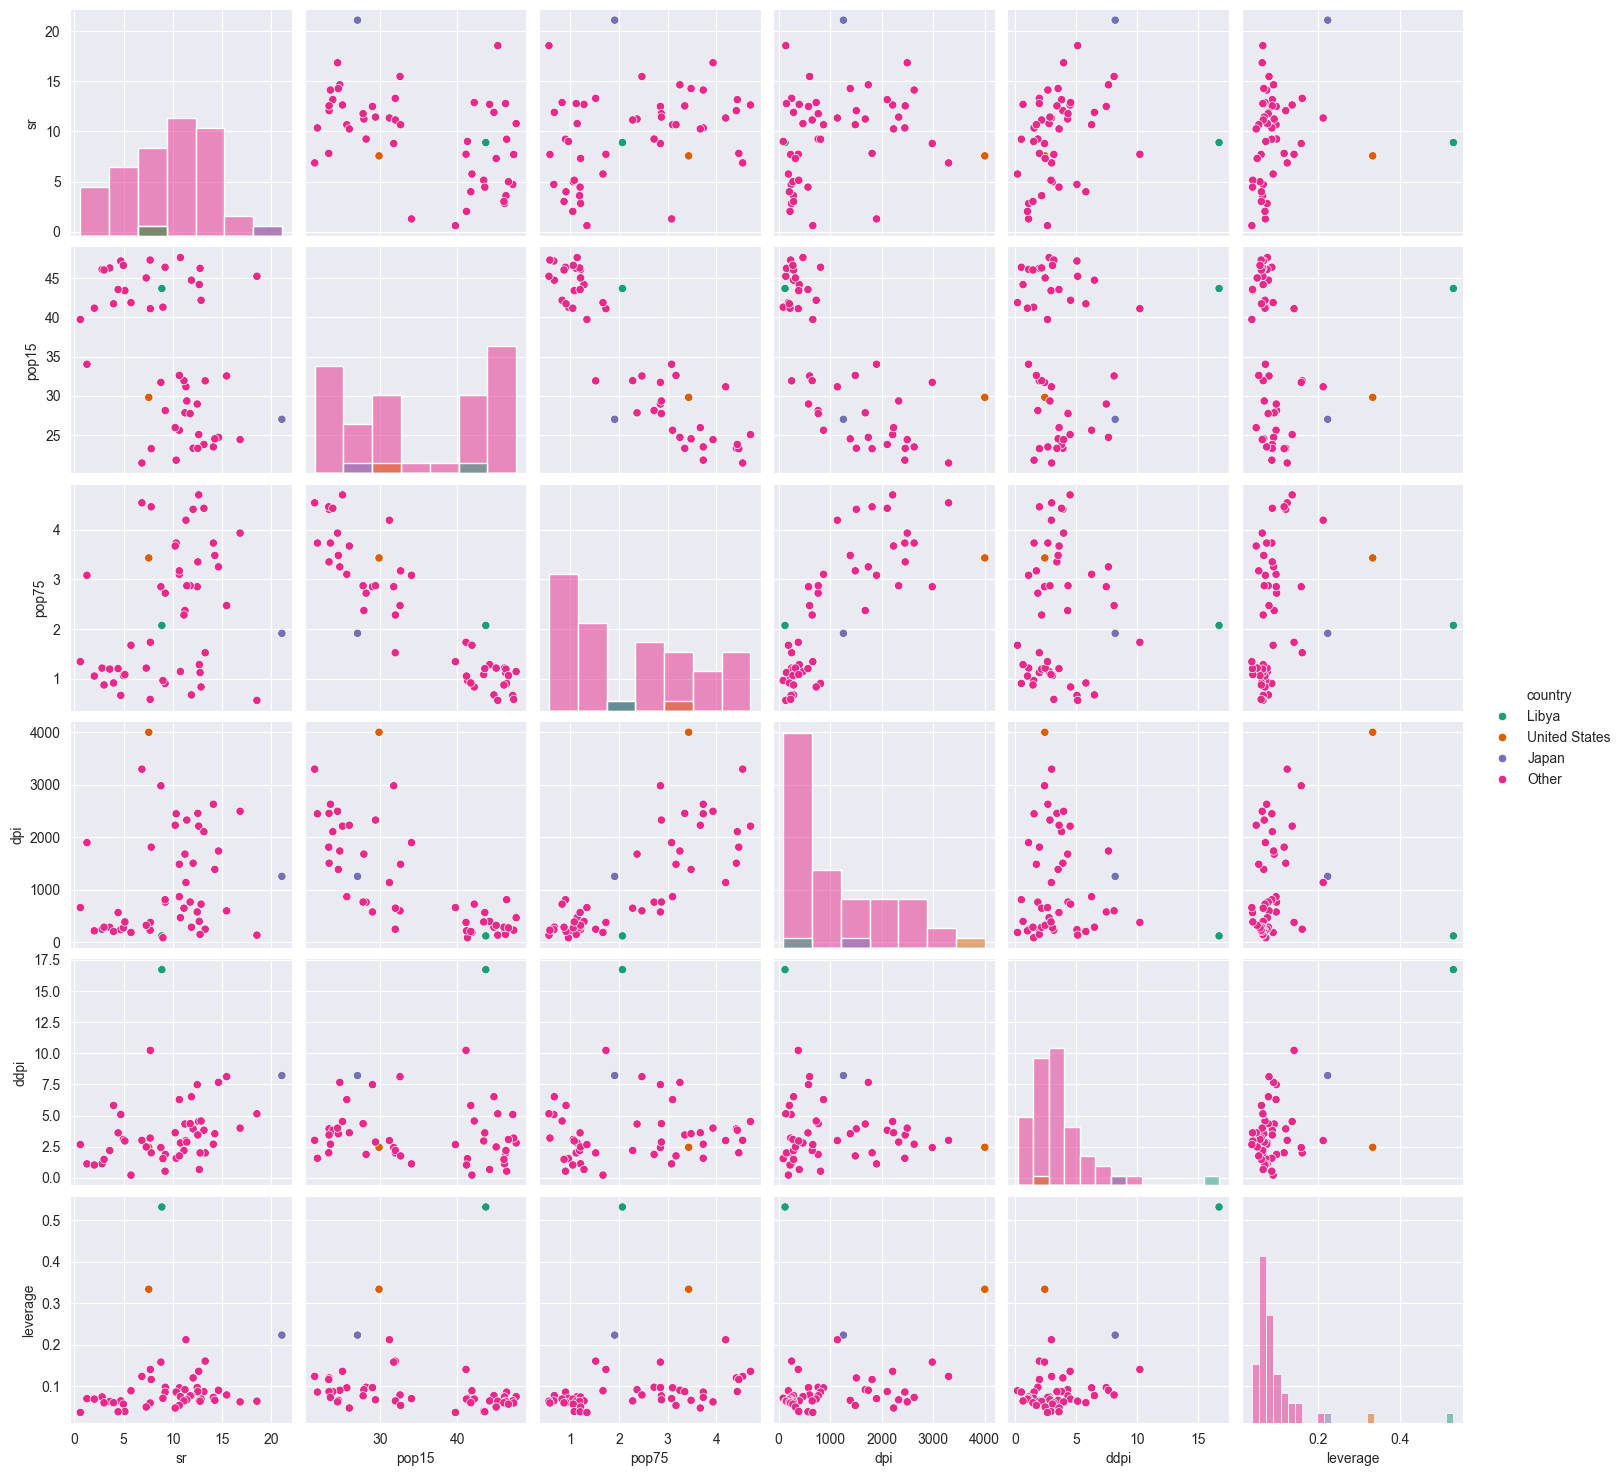

In [27]:
sns.pairplot(savings_sorted_df, hue='country', diag_kind='hist', palette='Dark2')

- Lybia: High ddpi and low dpi
- United States: High dpi and low ddpi
- Japan: High sr - pretty much in the middle everywhere else

c)

In [28]:
cooks_distance, _ = model.get_influence().cooks_distance
cooks_distance

array([8.03588844e-04, 8.17599740e-04, 7.15467384e-03, 7.27874362e-04,
       1.40273514e-02, 3.10619917e-04, 3.78132373e-02, 8.15698404e-03,
       1.87946022e-03, 3.20753658e-02, 2.87958030e-02, 5.81869850e-03,
       4.36405110e-03, 1.54717618e-02, 4.73657194e-05, 1.59010192e-02,
       1.06711076e-02, 4.74192020e-04, 4.35290158e-02, 2.96577844e-04,
       5.43963706e-02, 3.91909953e-03, 1.42816249e-01, 3.55538595e-02,
       3.99388235e-03, 1.14682665e-02, 5.55857003e-04, 2.74437726e-04,
       4.37921929e-03, 3.22647867e-04, 6.33367377e-03, 4.15722916e-02,
       4.40145720e-02, 4.52211969e-02, 9.73390021e-04, 2.40506270e-04,
       5.26728962e-03, 5.65908506e-04, 4.05596290e-02, 7.33474588e-03,
       4.22436983e-03, 9.56244662e-03, 1.49662804e-02, 1.28448115e-02,
       1.88614138e-02, 9.66327510e-02, 2.40267694e-02, 8.53232894e-03,
       2.68070416e-01, 9.11340399e-03])

In [29]:
savings_without_argmax_cooks_df = savings_df.drop(index=np.argmax(cooks_distance))
savings_without_argmax_cooks_df.head()

,Unnamed: 0,sr,pop15,pop75,dpi,ddpi,leverage
0,Australia,11.43,29.35,2.87,2329.68,2.87,0.067713
1,Austria,12.07,23.32,4.41,1507.99,3.93,0.120384
2,Belgium,13.17,23.80,4.43,2108.47,3.82,0.087482
3,Bolivia,5.75,41.89,1.67,189.13,0.22,0.089471
4,Brazil,12.88,42.19,0.83,728.47,4.56,0.069559


In [30]:
x2_sm = sm.add_constant(savings_without_argmax_cooks_df[['pop15', 'pop75', 'dpi', 'ddpi']])

model2 = sm.OLS(savings_without_argmax_cooks_df.sr, x2_sm).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sr   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                     6.065
Date:                Sun, 26 Oct 2025   Prob (F-statistic):           0.000562
Time:                        13:52:41   Log-Likelihood:                -132.24
No. Observations:                  49   AIC:                             274.5
Df Residuals:                      44   BIC:                             283.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.5240      8.224      2.982      0.005       7.950      41.098
pop15         -0.3914      0.158     -2.479      0.017      -0.710      -0.073
pop75         -1.2809      1.145     -1.118      0.269      -3.589       1.027
dpi           -0.0003      0.001     -0.343      0.733      -0.002       0.002
ddpi           0.6103      0.269      2.271      0.028       0.069       1.152
==============================================================================
Omnibus:                        0.449   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.799   Jarque-Bera (JB):                0.254
Skew:                           0.176   Prob(JB):                        0.881
Kurtosis:                       2.968   Cond. No.                     2.28e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.28e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

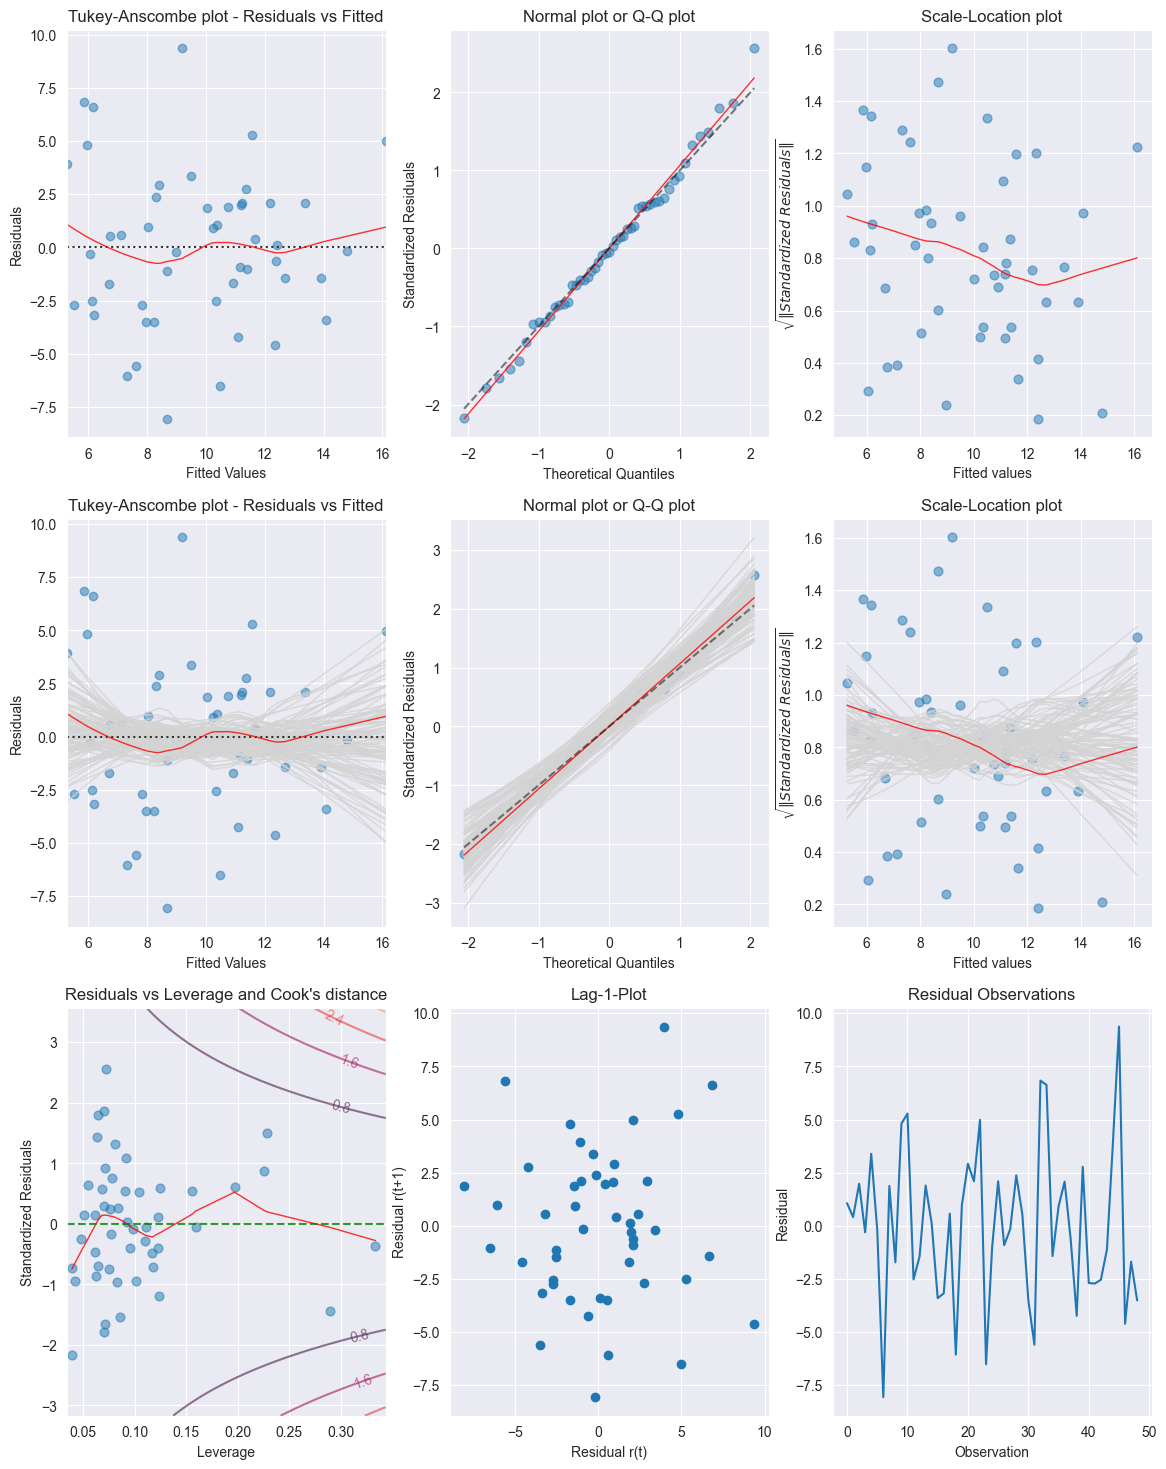

In [31]:
tma_plots(model2, n_samp=100)

In [32]:
residual_influence2 = model2.get_influence()
residual_influence_leverage2 = residual_influence2.hat_matrix_diag

savings_without_argmax_cooks_df['leverage'] = residual_influence_leverage2
savings_sorted_without_argmax_cooks_df = savings_without_argmax_cooks_df.sort_values('leverage', ascending=False)
savings_sorted_without_argmax_cooks_df.head()

,Unnamed: 0,sr,pop15,pop75,dpi,ddpi,leverage
43,United States,7.56,29.81,3.43,4001.89,2.45,0.333693
46,Jamaica,7.72,41.12,1.73,380.47,10.23,0.289721
22,Japan,21.10,27.01,1.91,1257.28,8.21,0.228428
20,Ireland,11.34,31.16,4.19,1139.95,2.99,0.225289
36,South Rhodesia,13.30,31.92,1.52,250.96,2.00,0.196935


In [33]:
savings_sorted_without_argmax_cooks_df['country'] = 'Other'
country_iloc2 = savings_sorted_without_argmax_cooks_df.columns.get_loc('country')

for i in range(3):
    savings_sorted_without_argmax_cooks_df.iloc[i, country_iloc2] = savings_sorted_without_argmax_cooks_df.iloc[i, 0]

savings_sorted_without_argmax_cooks_df.head()

,Unnamed: 0,sr,pop15,pop75,dpi,ddpi,leverage,country
43,United States,7.56,29.81,3.43,4001.89,2.45,0.333693,United States
46,Jamaica,7.72,41.12,1.73,380.47,10.23,0.289721,Jamaica
22,Japan,21.10,27.01,1.91,1257.28,8.21,0.228428,Japan
20,Ireland,11.34,31.16,4.19,1139.95,2.99,0.225289,Other
36,South Rhodesia,13.30,31.92,1.52,250.96,2.00,0.196935,Other


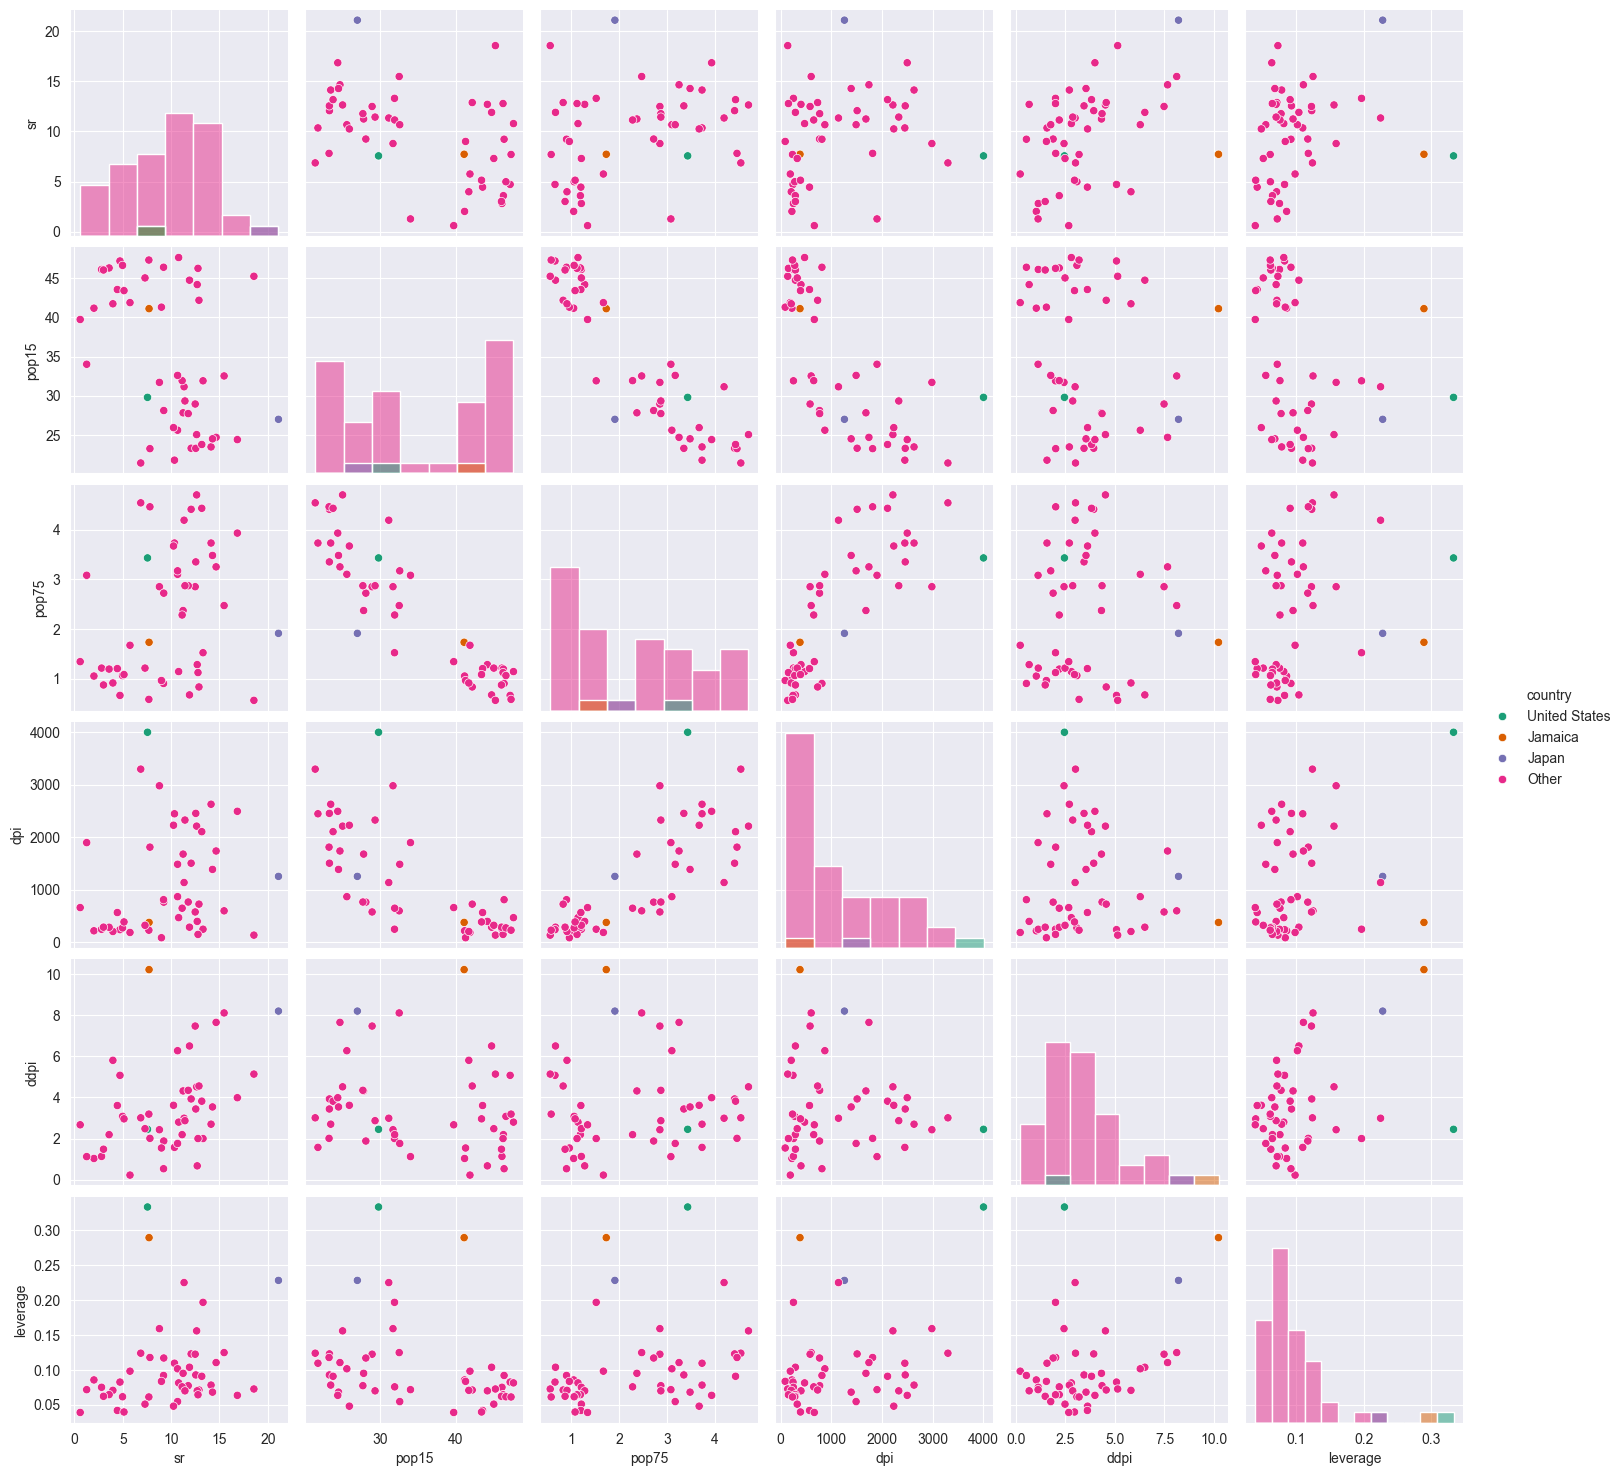

In [34]:
sns.pairplot(savings_sorted_without_argmax_cooks_df, hue='country', diag_kind='hist', palette='Dark2')

Now the top 3 countries are no longer the Lybia, United States and Japan - but rather United States, Jamaica and Japan.

- United States: High dpi and low ddpi
- Jamaica: High ddpi and low dpi
- Japan: High sr and ddpi - pretty much in the middle everywhere else

Overall the scatter plots look a bit more balanced than before, which makes sense because we removed the data point with the most leverage on our model.

d)

In [35]:
savings_df[['dpi', 'ddpi']]

log_dpi = np.log(savings_df['dpi'])
log_ddpi = np.log(savings_df['ddpi'])

In [36]:
log_sr = np.log(savings_df['sr'])
log_dpi = np.log(savings_df['dpi'])
log_ddpi = np.log(savings_df['ddpi'])

                            OLS Regression Results                            
Dep. Variable:                     sr   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     3.912
Date:                Sun, 26 Oct 2025   Prob (F-statistic):             0.0268
Time:                        13:53:18   Log-Likelihood:                -47.888
No. Observations:                  50   AIC:                             101.8
Df Residuals:                      47   BIC:                             107.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6246      0.194      8.357      0.0

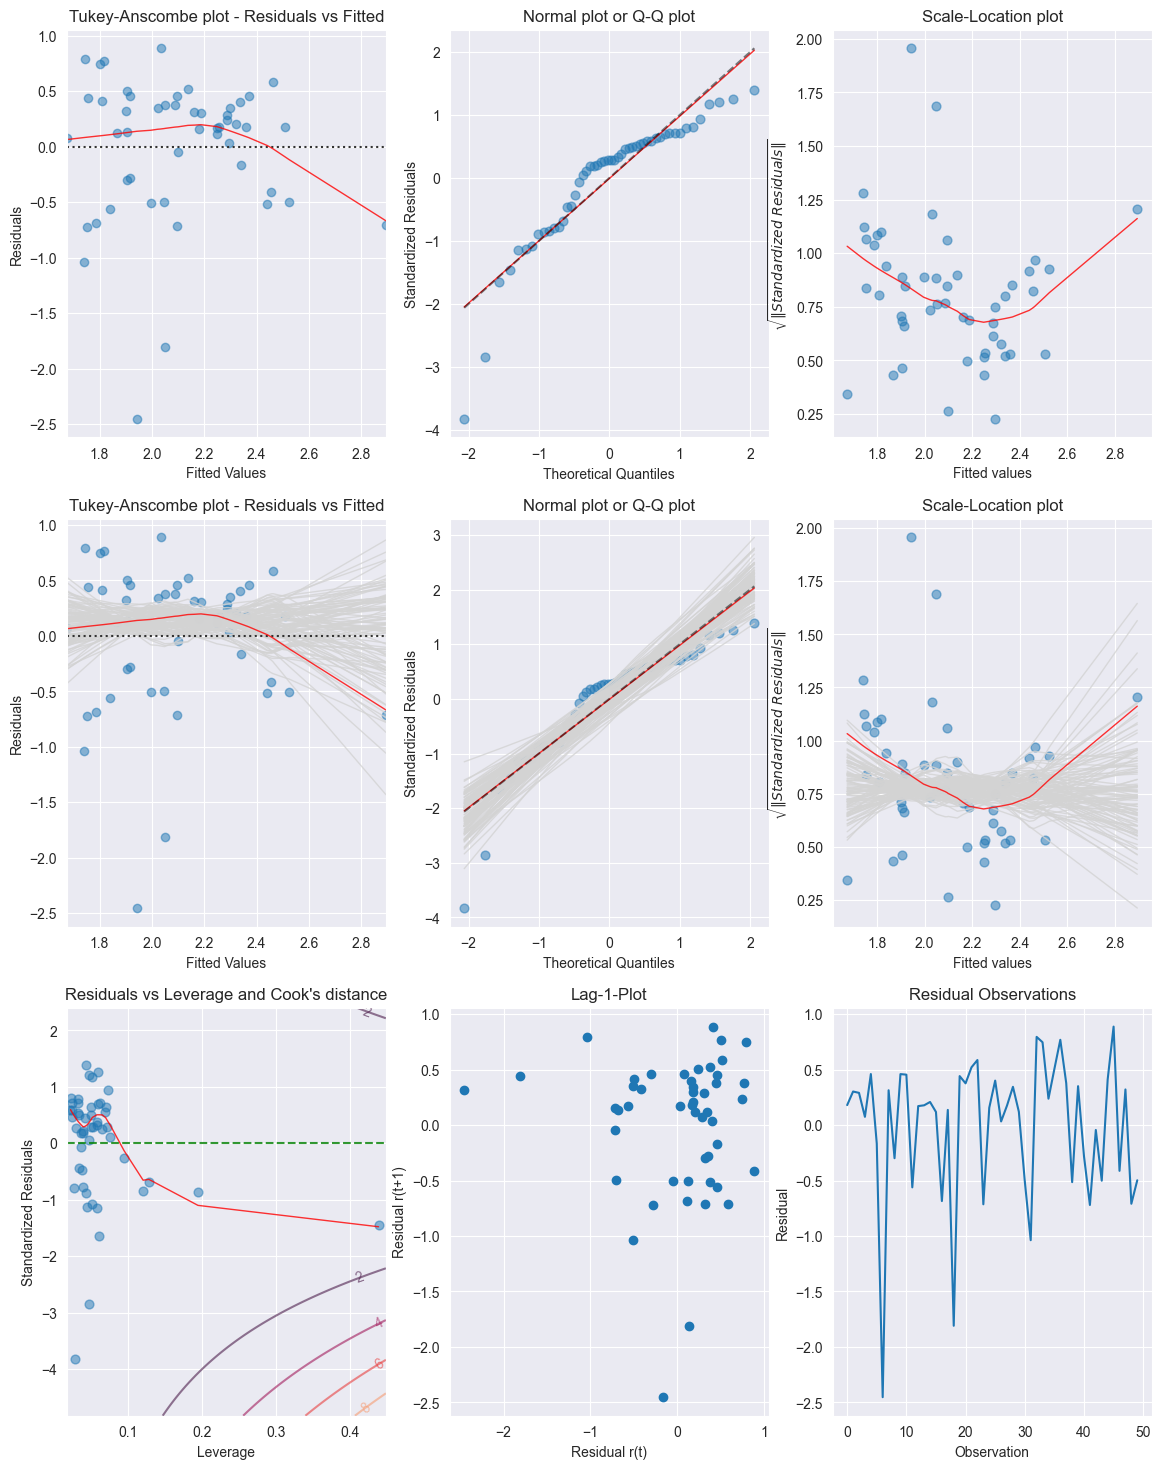

In [37]:
x_log1_sm = sm.add_constant(savings_df[['dpi', 'ddpi']])
model_log1 = sm.OLS(log_sr, x_log1_sm).fit()

print(model_log1.summary())
tma_plots(model_log1, n_samp=100)

                            OLS Regression Results                            
Dep. Variable:                     sr   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                     6.081
Date:                Sun, 26 Oct 2025   Prob (F-statistic):            0.00448
Time:                        13:53:22   Log-Likelihood:                -139.67
No. Observations:                  50   AIC:                             285.3
Df Residuals:                      47   BIC:                             291.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3127      3.804      0.082      0.9

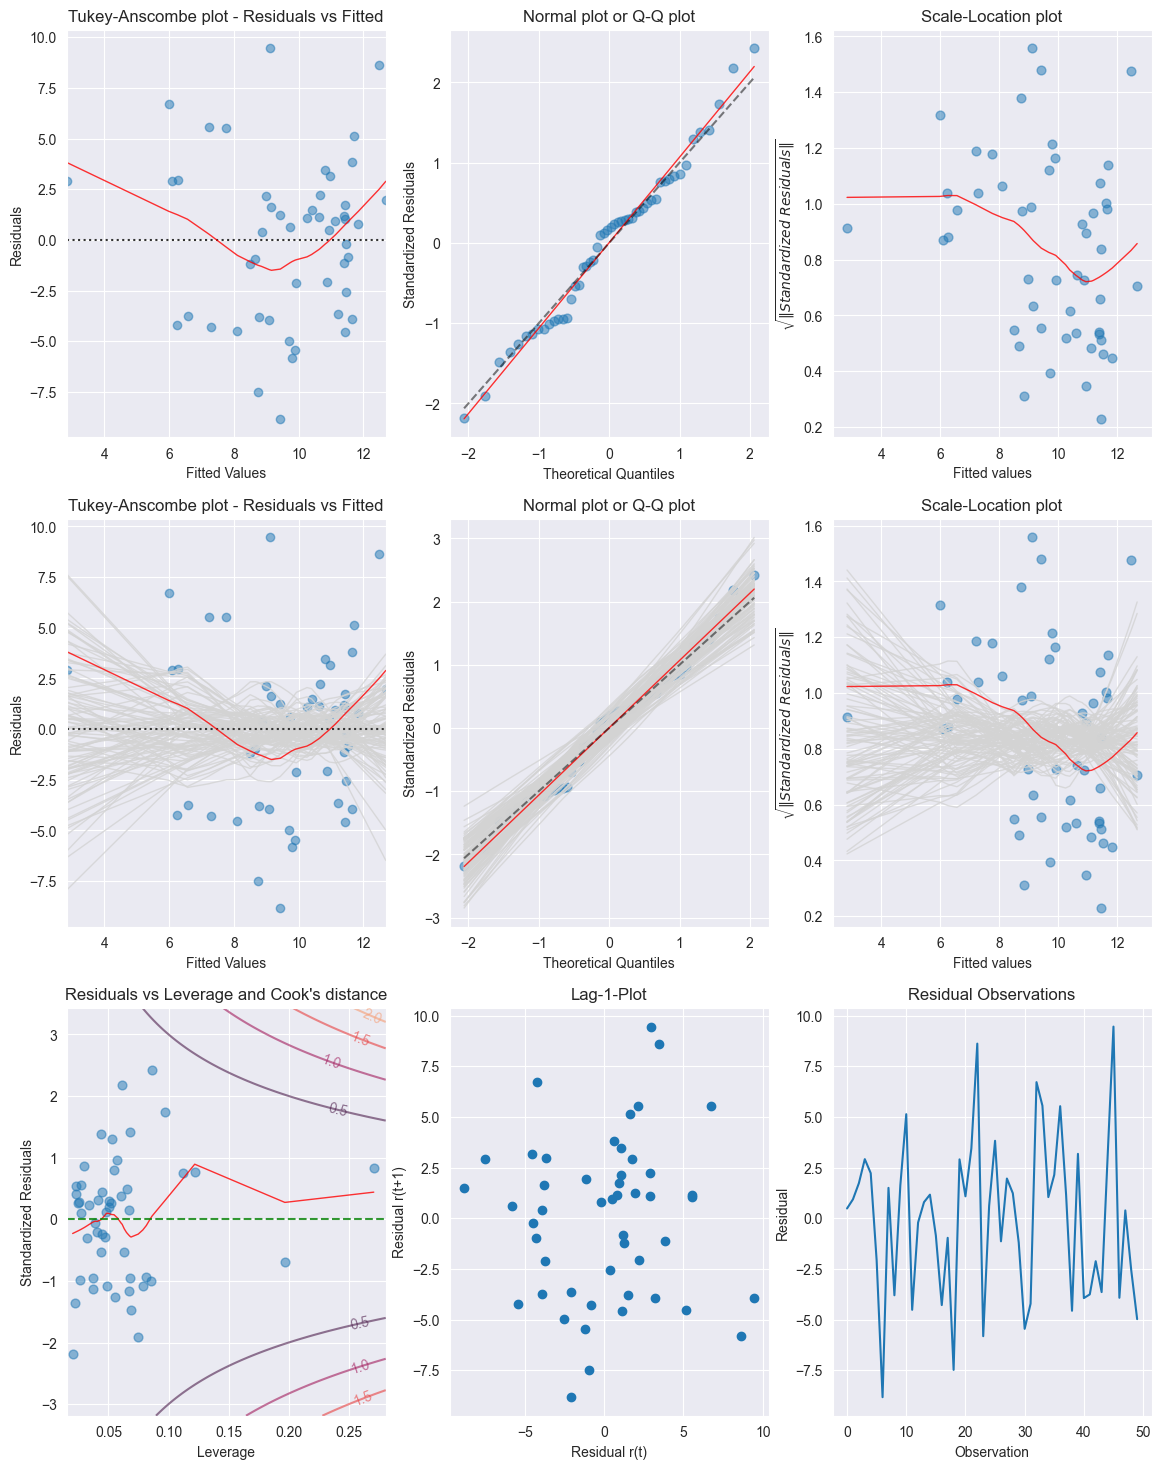

In [38]:
x_log2_sm = sm.add_constant(pd.DataFrame({ 'dpi': log_dpi, 'ddpi': log_ddpi }))
model_log2 = sm.OLS(savings_df.sr, x_log2_sm).fit()

print(model_log2.summary())
tma_plots(model_log2, n_samp=100)

                            OLS Regression Results                            
Dep. Variable:                     sr   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     4.330
Date:                Sun, 26 Oct 2025   Prob (F-statistic):             0.0188
Time:                        13:53:26   Log-Likelihood:                -47.510
No. Observations:                  50   AIC:                             101.0
Df Residuals:                      47   BIC:                             106.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8646      0.602      1.436      0.1

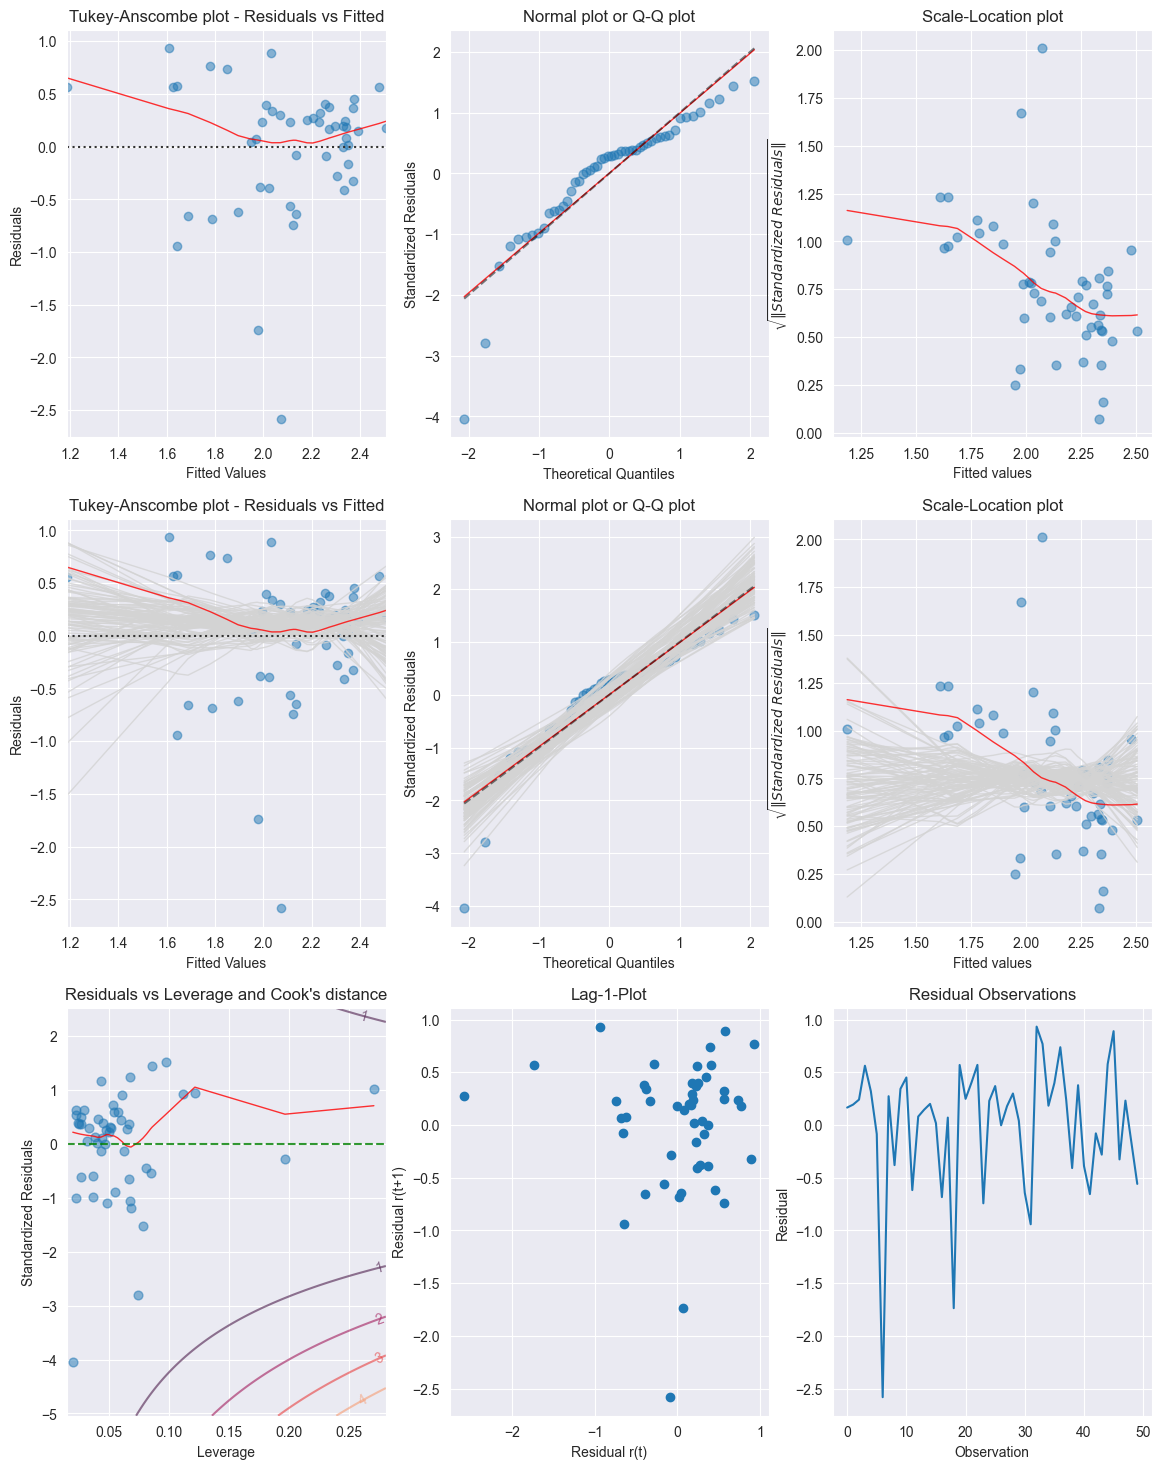

In [39]:
x_log3_sm = sm.add_constant(pd.DataFrame({ 'dpi': log_dpi, 'ddpi': log_ddpi }))
model_log3 = sm.OLS(log_sr, x_log3_sm).fit()

print(model_log3.summary())
tma_plots(model_log3, n_samp=100)

From $R^2$ and the Prob (F-statistic) values, model 2 is the best choice: It explains the most variance out of the three ($R^2$) and has the smallest p-value (0.00448). In addition, model 2 is the only one which conforms to all the assumption of a linear regression model:

1. For the expected value of all $\epsilon_i$ we have $E[\epsilon_i] = 0$:
    - ✅ The Tukey-Anscompe plot (upper-left) shows that the residuals are contained within the grey smoothing lines. We conclude that the expected value of all $\epsilon_i$ is zero.
2. The error terms $\epsilon_i$ all have the same constant variance $Var[\epsilon_i] = \sigma^2$
    - ✅ The Scale-Location Plot (upper-right) tends to decrease, but it is contained within the grey band of simulated smoothing curves. We conclude that the variances of the error terms $\epsilon_i$ are constant.
3. The error terms $\epsilon_i$ are normally distributed
    - ✅ The data points are contained in the grey band of the simulated curves in the Q-Q plot (upper-middle). We therefore interpret the error terms $\epsilon_i$ as normally distributed.
4. The error terms $\epsilon_i$ are independent
    - ✅ There is no specific notion of time in the data. Therefore we assume that the error terms $\epsilon_i$ are independent.

# Exercise 3.3


In [40]:
synthetisch_df = pd.read_csv('../Data/synthetisch.csv')
synthetisch_df.head()

,Unnamed: 0,y,x1,x2
0,1,33.50,19.19,-3.42
1,2,27.29,17.57,-4.52
2,3,22.60,18.57,-6.82
3,4,13.39,22.06,-12.33
4,5,20.71,18.09,-7.09


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     39.41
Date:                Sun, 26 Oct 2025   Prob (F-statistic):           1.23e-12
Time:                        13:53:37   Log-Likelihood:                -262.13
No. Observations:                  83   AIC:                             530.3
Df Residuals:                      80   BIC:                             537.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         72.9020      9.648      7.556      0.0

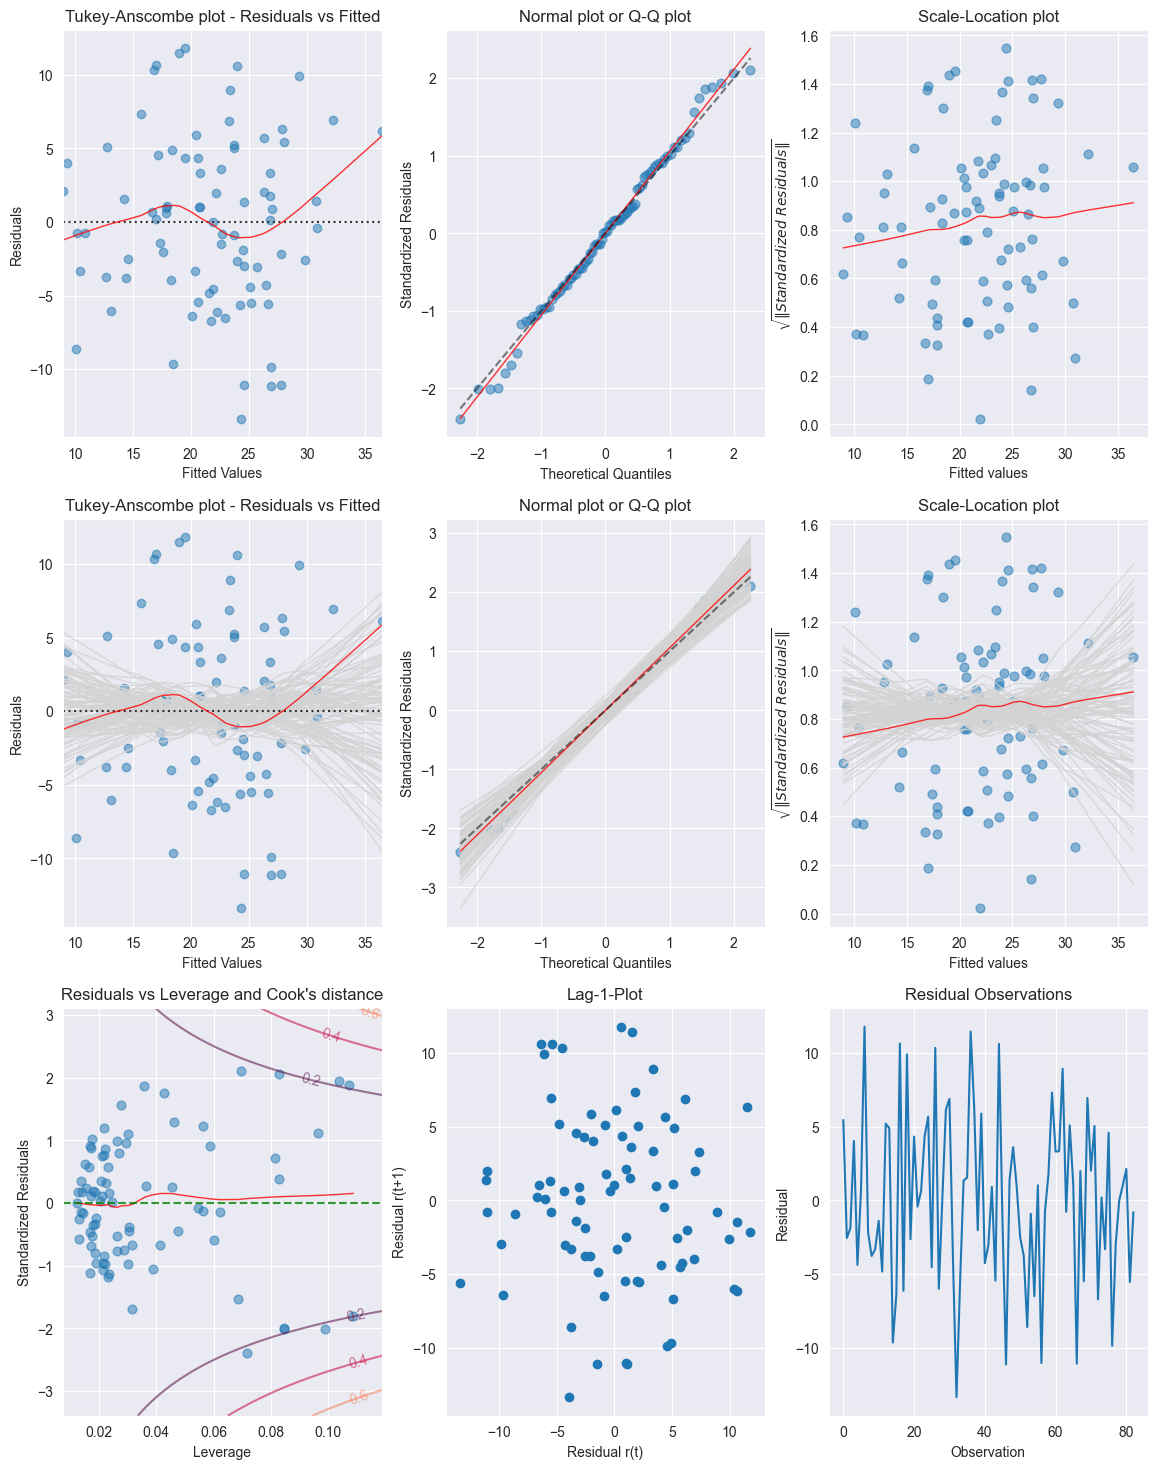

In [41]:
x_sm = sm.add_constant(synthetisch_df[['x1', 'x2']])
model = sm.OLS(synthetisch_df.y, x_sm).fit()

print(model.summary())
tma_plots(model, n_samp=100)

**Residual Analysis:**

1. For the expected value of all $\epsilon_i$ we have $E[\epsilon_i] = 0$:
    - ✅ The Tukey-Anscompe plot (upper-left) shows that the residuals are contained within the grey smoothing lines. We conclude that the expected value of all $\epsilon_i$ is zero.
2. The error terms $\epsilon_i$ all have the same constant variance $Var[\epsilon_i] = \sigma^2$
    - ✅ The Scale-Location Plot (upper-right) tends to increase, but it is contained within the grey band of simulated smoothing curves. We conclude that the variances of the error terms $\epsilon_i$ are constant.
3. The error terms $\epsilon_i$ are normally distributed
    - ✅ The data points are contained in the grey band of the simulated curves in the Q-Q plot (upper-middle). We therefore interpret the error terms $\epsilon_i$ as normally distributed.
4. The error terms $\epsilon_i$ are independent
    - ✅ There is no specific notion of time in the data. Therefore we assume that the error terms $\epsilon_i$ are independent.

**Conclusion:** All assumptions of a linear regression are fulfilled.

In [42]:
import matplotlib.pyplot as plt
from matplotlib import cm

''' %matplotlib tk will open all plots in a new window,
where you can scroll, zoom, rotate, and more. '''
%matplotlib tk

''' Create data: '''
n = 20 # points in grid

# x1 and x2, evenly spaced along grid
x_1 = np.linspace(15, 25, n)
x_2 = np.linspace(0, -15, n)

# predicted values for y at x1 and x2
y_pred = np.zeros((n, n))
for i in range(len(x_1)):
    x_1i = np.array(x_1[i])

    for j in range(len(x_2)):
        x_2j = np.array(x_2[j])
        x_sm = sm.add_constant([[1, x_1i, x_2j]])
        y_pred[i, j] = model.predict(x_sm)

# create grid
x_1, x_2 = np.meshgrid(x_1, x_2)

# Create Figure
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, projection='3d')
# Plot the surface.
surf = ax.plot_surface(x_1, x_2, y_pred, cmap=cm.coolwarm, alpha=.8)
# Set Labels
ax.set_xlabel("x_1"), ax.set_ylabel("x_2"), ax.set_zlabel("y")
ax.set_title("predicted and true y")
# 3D scatterplot
ax.scatter(synthetisch_df.x1, synthetisch_df.x2, synthetisch_df.y, alpha=1., linewidth=2)
plt.tight_layout()
plt.show()

/var/folders/mg/f7gk10vj1_153rz1zkvd13_00000gn/T/ipykernel_74809/2509944193.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred[i, j] = model.predict(x_sm)


The Residual Analysis Results are actually missleading:

At first sight the hyperplane seems to fit the data reasonably well (Figure 1). But if we have a look from another angle we can clearly see that the predicted hyperplane is actually not fitting the data very well because of a handful leverage points which prevent the hyperplane to correctly fit the data (Figure 2).


![Exercise 3.3, Figure 1](Exercise-3.3_1.png)

![Exercise 3.3, Figure 1](Exercise-3.3_2.png)